In [1]:
%load_ext autoreload
%autoreload 2

# standard python imports
import numpy as np
import matplotlib.pyplot as plt

# tidy3d imports
import tidy3d as td
import tidy3d.web as web

Using Tidy3D credentials from stored file


In [2]:
# for easy conversion of units
unit = 1

# radius and location of the sphere
radius = 0.5 * unit
center = [0, 0, 0]

# permittivity of the sphere
epsr = 4

# set center frequency and wavelength
#f0 = 1e9
#wavelength = td.C_0 / f0

# free space central wavelength
wavelength = (2 * radius) * 0.2
#wavelength = (2 * radius) * 1.2
f0 = td.C_0 / wavelength

print(wavelength, f0)

# buffer between the sphere and the start of the PML layers
buffer_PML = 4 * wavelength
#buffer = radius

# buffer between the sphere and the near field monitor
#buffer_mon = buffer_PML / 2
#buffer_mon = radius / 2
buffer_mon = 1 * wavelength

# Define material properties
air = td.Medium(permittivity=1)
diel = td.Medium(permittivity=epsr)

# resolution control
grids_per_wavelength = 25
#grids_per_wavelength = 45

# Number of PML layers to use along each direction
npml = grids_per_wavelength

# create the sphere
sphere = td.Structure(geometry=td.Sphere(center=center, radius=radius), medium=diel)
geometry = [sphere]
#geometry = []


0.2 1498962292904734.0


## Process Geometry

Next we need to do conversions to get the problem parameters ready to define the simulation.

In [3]:
# grid size (um)
dl = wavelength / grids_per_wavelength

# Define PML layers
pml_layers = 3*[td.PML()]

# Compute the domain size in x, y, and z

domain_size = buffer_PML + 2 * radius + buffer_PML

# construct simulation size array
sim_size = (domain_size, domain_size, domain_size)

In [4]:
# Bandwidth in Hz
fwidth = f0 / 10.0

# Gaussian source offset; the source peak is at time t = offset/fwidth
offset = 4.

# time dependence of source
gaussian = td.GaussianPulse(freq0=f0, fwidth=fwidth, offset=offset)

# place the source above the sphere (z+), propagating downwards (along z-)
source = td.PlaneWave(
    center=(0,0,-(radius + 3 * buffer_PML / 4)),
    size=(td.inf, td.inf, 0),
    source_time=gaussian,
    direction='+',
    pol_angle=0)

# Simulation run time past the source decay (around t=2*offset/fwidth)
run_time = 60 / fwidth


In [5]:
# create a volume monitor around the sphere
mon_size = 2 * radius + 2 * buffer_mon
#mon_size = wavelength
monitor = td.FieldMonitor(
    center=[0, 0, 0],
    size=[mon_size, mon_size, mon_size],
    freqs=[f0],
    name='near_field')

# get the surface monitors associated with the volume monitor
monitors = monitor.surfaces()


## Create Simulation

Now we can put everything together and define a simulation class to be run



In [6]:
sim = td.Simulation(
    size=sim_size,
    grid_size=[dl, dl, dl],
    structures=geometry,
    sources=[source],
    monitors=monitors,
    run_time=run_time,
    pml_layers=pml_layers
)

sim_empty = td.Simulation(
    size=sim_size,
    grid_size=[dl, dl, dl],
    structures=[],
    sources=[source],
    monitors=monitor.surfaces(),
    run_time=run_time,
    pml_layers=pml_layers
)

## Visualize Geometry

Lets take a look and make sure everything is defined properly


<Figure size 1440x576 with 6 Axes>

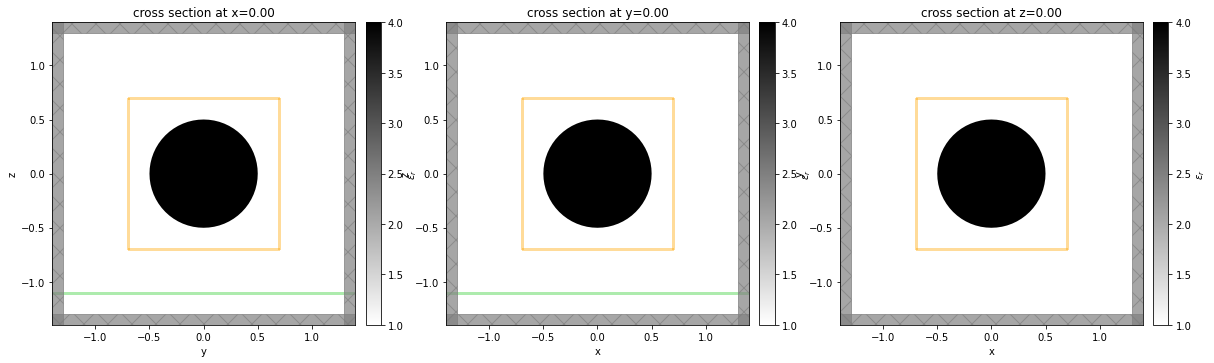

<Figure size 1440x576 with 6 Axes>

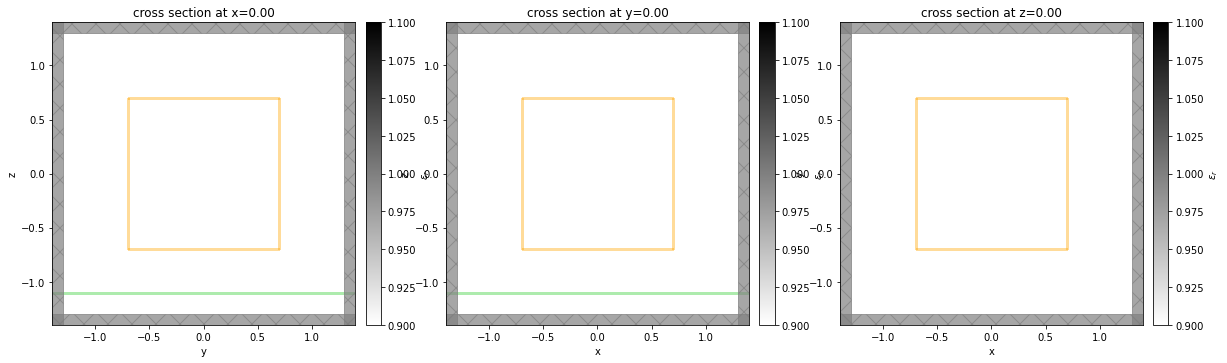

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
sim.plot_eps(x=0, ax=ax1);
sim.plot_eps(y=0, ax=ax2);
sim.plot_eps(z=0, ax=ax3);

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
sim_empty.plot_eps(x=0, ax=ax1);
sim_empty.plot_eps(y=0, ax=ax2);
sim_empty.plot_eps(z=0, ax=ax3);

## Run Simulation

Now we can run the simulation over time and measure the results to plot


In [8]:
# Run simulation
import tidy3d.web as web
sim_data = web.run(sim, task_name='sphereRCS', path='data/sphereRCS.hdf5')
# sim_data = web.load('3e650fd4-548e-4556-b38a-e473c3c53eb7', sim, path='data/sphereRCS.hdf5')

sim_empty_data = web.run(sim_empty, task_name='sphereRCS_empty', path='data/sphereRCS_empty.hdf5')

#sim_data = SimulationData.from_file(fname='data/simulation.hdf5')
#sim_data_empty = SimulationData.from_file(fname='data/sphereRCS_empty.hdf5')

import copy
sim_data_save = copy.deepcopy(sim_data)


[16:58:15] INFO     Uploaded task 'sphereRCS' with task_id                      ]8;id=926518;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=239048;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#108\108]8;;\
                    'a61d1347-555e-41be-9f98-8a6fe3c73f4a'.                                  

Output()

[16:58:16] status = queued                                                      ]8;id=302853;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=801436;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[16:58:38] status = preprocess                                                  ]8;id=136026;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=800906;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[16:59:07] status = running                                                     ]8;id=216773;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=809730;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[17:05:52] status = postprocess                                                 ]8;id=425971;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=2332;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[17:06:01] status = success                                                     ]8;id=923556;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=454079;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[17:06:02] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=160143;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=196287;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#483\483]8;;\
                    "data/sphereRCS.hdf5"                                                    

Output()

[17:06:12] INFO     loading SimulationData from data/sphereRCS.hdf5             ]8;id=21078;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=541079;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#302\302]8;;\

           WARNING  Simulation final field decay value of 0.000117 is greater   ]8;id=516216;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=79913;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#308\308]8;;\
                    than the simulation shutoff threshold of 1e-05. Consider                 
                    simulation again with large run_time duration for more                   
                    accurate results.                                                        

[17:06:13] INFO     Uploaded task 'sphereRCS_empty' with task_id                ]8;id=969376;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=422922;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#108\108]8;;\
                    '36e3c051-6773-445b-bcde-fb34d369591e'.                                  

Output()

[17:06:14] status = queued                                                      ]8;id=533307;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=176836;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[17:06:38] status = preprocess                                                  ]8;id=659918;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=255491;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[17:07:07] status = running                                                     ]8;id=357478;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=200038;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[17:07:43] status = postprocess                                                 ]8;id=693858;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=969182;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[17:07:52] status = success                                                     ]8;id=316304;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=5477;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[17:07:52] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=649762;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=978794;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#483\483]8;;\
                    "data/sphereRCS_empty.hdf5"                                              

Output()

[17:08:12] INFO     loading SimulationData from data/sphereRCS_empty.hdf5       ]8;id=149677;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=514754;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#302\302]8;;\

In [9]:
sim_data = td.SimulationData.from_file(fname='data/sphereRCS.hdf5')
sim_data_empty = td.SimulationData.from_file(fname='data/sphereRCS_empty.hdf5')


We now can inspect the field patterns on the area monitors using the Tidy3D built in field visualization methods.

<Figure size 1080x252 with 6 Axes>

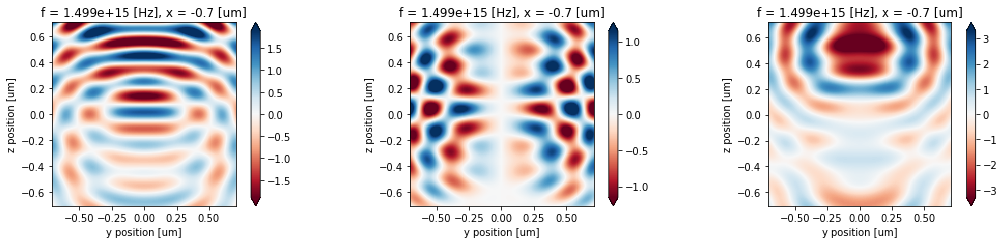

<Figure size 1080x252 with 6 Axes>

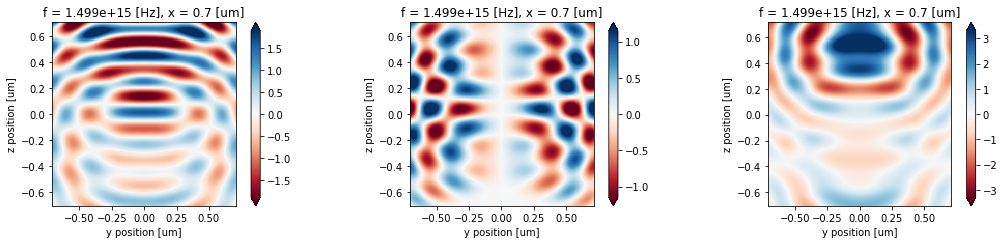

<Figure size 1080x252 with 6 Axes>

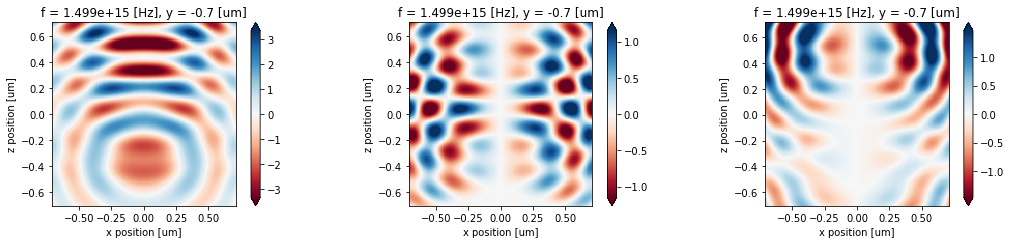

<Figure size 1080x252 with 6 Axes>

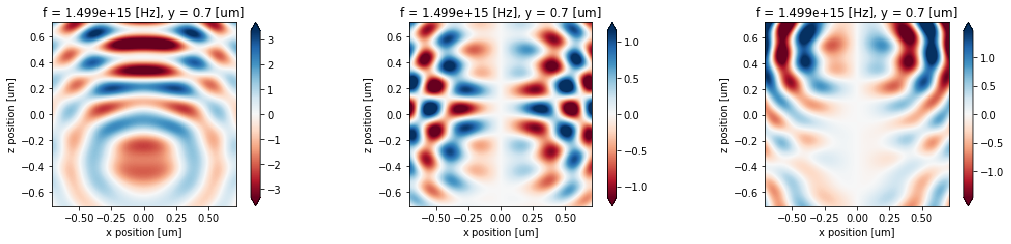

<Figure size 1080x252 with 6 Axes>

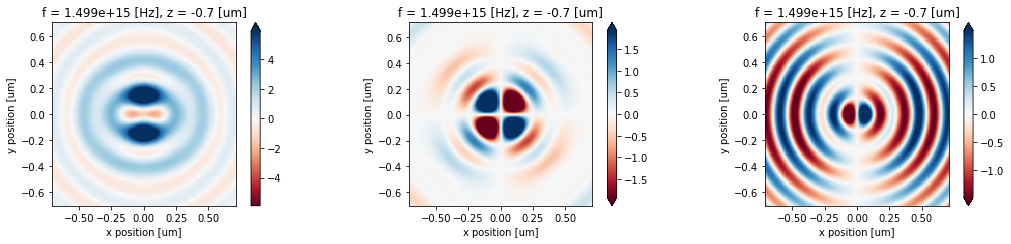

<Figure size 1080x252 with 6 Axes>

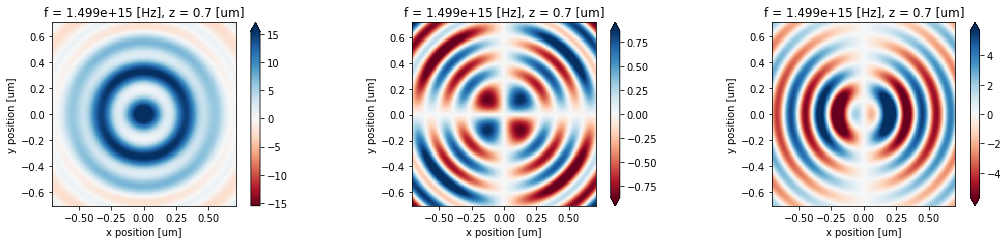

In [10]:

sim_data = copy.deepcopy(sim_data_save)

for mon in monitors:
    sim_data[mon.name].Ex -= sim_empty_data[mon.name].Ex
    sim_data[mon.name].Ey -= sim_empty_data[mon.name].Ey
    sim_data[mon.name].Ez -= sim_empty_data[mon.name].Ez

    sim_data[mon.name].Hx -= sim_empty_data[mon.name].Hx
    sim_data[mon.name].Hy -= sim_empty_data[mon.name].Hy
    sim_data[mon.name].Hz -= sim_empty_data[mon.name].Hz

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ex', x=monitors[0].center[0], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ey', x=monitors[0].center[0], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ez', x=monitors[0].center[0], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ex', x=monitors[1].center[0], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ey', x=monitors[1].center[0], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ez', x=monitors[1].center[0], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ex', y=monitors[2].center[1], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ey', y=monitors[2].center[1], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ez', y=monitors[2].center[1], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ex', y=monitors[3].center[1], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ey', y=monitors[3].center[1], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ez', y=monitors[3].center[1], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ex', z=monitors[4].center[2], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ey', z=monitors[4].center[2], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ez', z=monitors[4].center[2], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ex', z=monitors[5].center[2], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ey', z=monitors[5].center[2], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ez', z=monitors[5].center[2], val='real', freq=f0, ax=ax3)

plt.show()


In [21]:

import copy

from tidy3d.plugins import Near2Far

n2fmons = copy.deepcopy(monitors)
#del n2fmons[0:3]
n2f = Near2Far(sim_data, mons=n2fmons, frequency=f0, pts_per_wavelength=5)
#n2f.spacetime_sign = -1


In [25]:
# projection distance
far_distance = 100 * wavelength

num_theta = 300
num_phi = 2
thetas = np.linspace(0, np.pi, num_theta)
phis = np.linspace(0, np.pi/2, num_phi)

# initialize the far field values
RCS = np.zeros((num_theta, num_phi), dtype=float)
E = np.zeros((3, num_theta, num_phi), dtype=complex)

from rich.progress import track

# loop through points in the output plane
for i in track(np.arange(len(thetas)), description='Performing far-field transformation...'):

    theta = thetas[i]
    for j in np.arange(len(phis)):
        phi = phis[j]

        # compute and store the outputs from projection function at the focal plane
        _RCS = n2f.radar_cross_section(far_distance, theta, phi)
        RCS[i, j] = np.squeeze(_RCS)

        _E, _H = n2f.fields_spherical(far_distance, theta, phi)
        E[:, i, j] = np.squeeze(_E)
        
        #print(RCS[i, j], E[i, j])

        
        
# _RCS_test = n2f.radar_cross_section(far_distance, thetas, phis)


Output()

/tmp/ipykernel_390332/692352382.py:9: RuntimeWarning: invalid value encountered in true_divide
  val = val / np.max(np.abs(val))
/tmp/ipykernel_390332/692352382.py:9: RuntimeWarning: invalid value encountered in true_divide
  val = val / np.max(np.abs(val))


<Figure size 540x360 with 1 Axes>

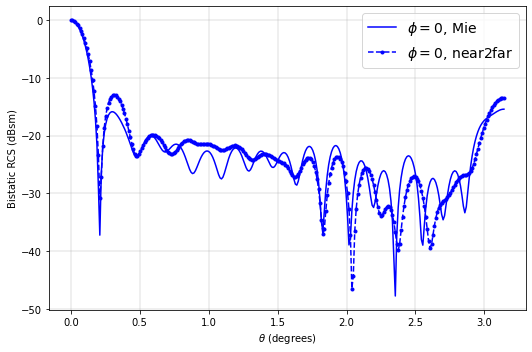

<Figure size 540x360 with 1 Axes>

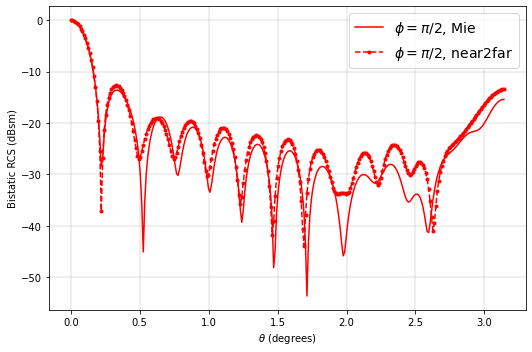

<Figure size 540x360 with 1 Axes>

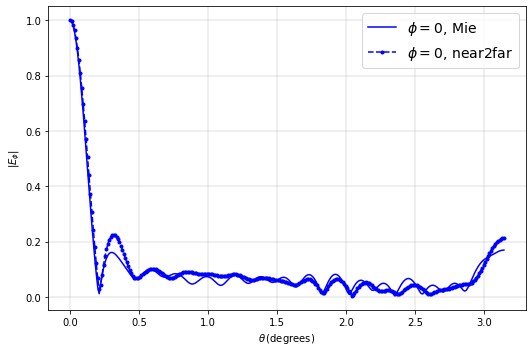

<Figure size 540x360 with 1 Axes>

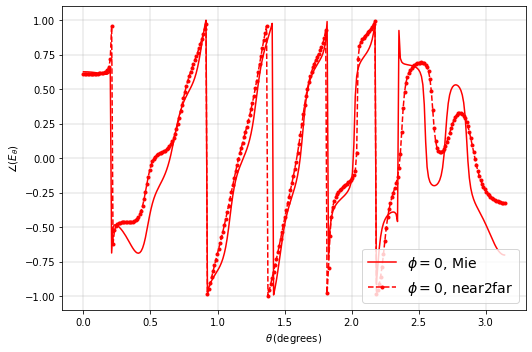

<Figure size 540x360 with 1 Axes>

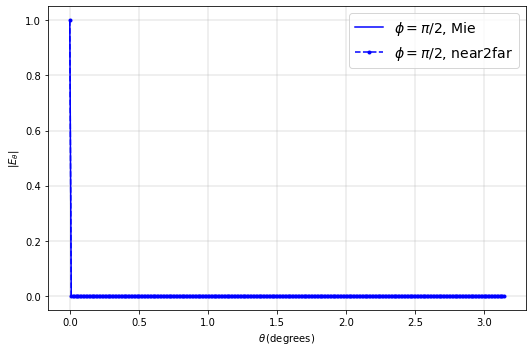

<Figure size 540x360 with 1 Axes>

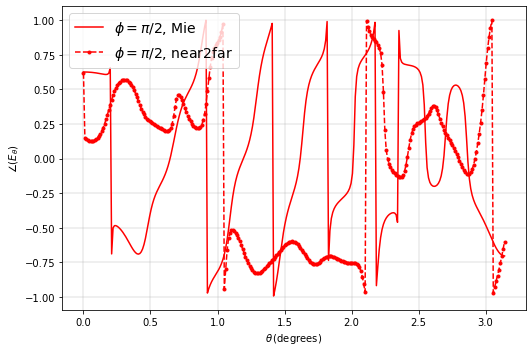

<Figure size 540x360 with 1 Axes>

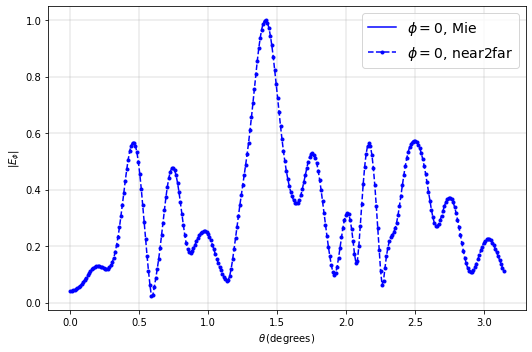

<Figure size 540x360 with 1 Axes>

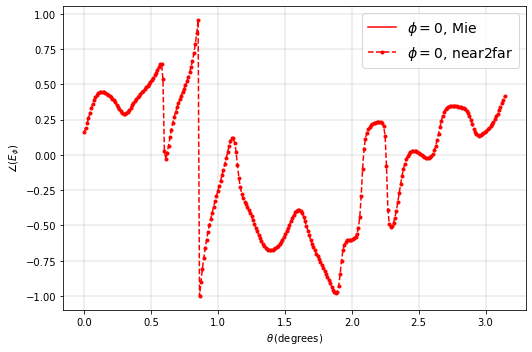

<Figure size 540x360 with 1 Axes>

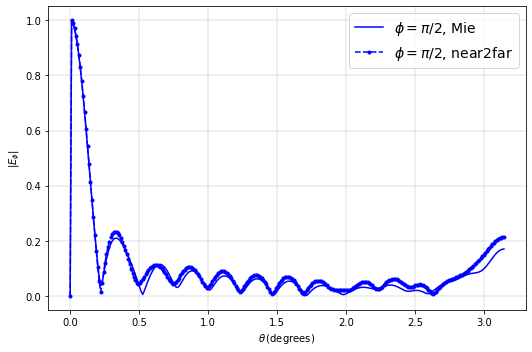

<Figure size 540x360 with 1 Axes>

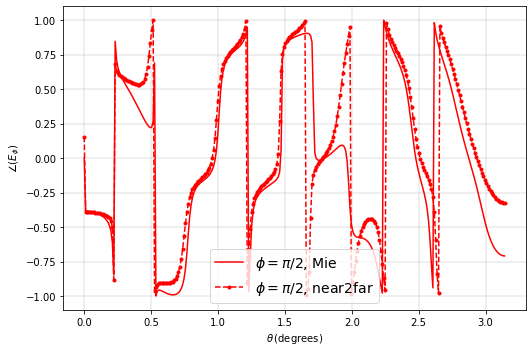

In [26]:
def scale_fn(val):
    val = val / np.max(np.abs(val))
    return 10.0*np.log10(val)

def plot_fn(val):
    return np.abs(val)

def plot_fn2(val):
    val = val / np.max(np.abs(val))
    return val

fileid = '0p2lamb_epsr4'


# ====== RCS ======

RCS_phi0 = scale_fn(np.squeeze(RCS[:,0]))
RCS_phi90 = scale_fn(np.squeeze(RCS[:,1]))

mie_filename_phi0 = "./data/mie_bRCS_phi0_" + fileid + ".txt"
mie_filename_phi90 = "./data/mie_bRCS_phi90_" + fileid + ".txt"

mie_data_phi0 = np.loadtxt(mie_filename_phi0, delimiter='\t', skiprows=2)
mie_theta_phi0 = np.squeeze(mie_data_phi0[:,[0]])
mie_phi0 = scale_fn(np.squeeze(mie_data_phi0[:,[1]]))

mie_data_phi90 = np.loadtxt(mie_filename_phi90, delimiter='\t', skiprows=2)
mie_theta_phi90 = np.squeeze(mie_data_phi90[:,[0]])
mie_phi90 = scale_fn(np.squeeze(mie_data_phi90[:,[1]]))

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_theta_phi0, mie_phi0, '-b', label="$\\phi = 0$, Mie")
ax.plot(thetas, RCS_phi0, '.--b', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta$ (degrees)",
       ylabel = "Bistatic RCS (dBsm)",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_theta_phi90, mie_phi90, '-r', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, RCS_phi90, '.--r', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta$ (degrees)",
       ylabel = "Bistatic RCS (dBsm)",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()


# ====== E ======

Eth_phi0 = ((np.squeeze(E[1,:,0])))
Eth_phi90 = ((np.squeeze(E[1,:,1])))

Eph_phi0 = ((np.squeeze(E[2,:,0])))
Eph_phi90 = ((np.squeeze(E[2,:,1])))

mie_E_filename_phi0 = "./data/mie_E_phi0_" + fileid + ".txt"
mie_E_filename_phi90 = "./data/mie_E_phi90_" + fileid + ".txt"

mie_E_data_phi0 = np.loadtxt(mie_E_filename_phi0, delimiter=' ', skiprows=2)
mie_E_theta_phi0 = np.squeeze(mie_E_data_phi0[:,[0]])
mie_Eth_phi0 = (np.squeeze(mie_E_data_phi0[:,[3]] + 1j*mie_E_data_phi0[:,[4]]))
mie_Eph_phi0 = (np.squeeze(mie_E_data_phi0[:,[5]] + 1j*mie_E_data_phi0[:,[6]]))

mie_E_data_phi90 = np.loadtxt(mie_E_filename_phi90, delimiter=' ', skiprows=2)
mie_E_theta_phi90 = np.squeeze(mie_E_data_phi90[:,[0]])
mie_Eth_phi90 = (np.squeeze(mie_E_data_phi90[:,[3]] + 1j*mie_E_data_phi90[:,[4]]))
mie_Eph_phi90 = (np.squeeze(mie_E_data_phi90[:,[5]] + 1j*mie_E_data_phi90[:,[6]]))

# ------ E_theta, phi = 0 ------

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi0, plot_fn2(np.abs(mie_Eth_phi0)), '-b', label="$\\phi = 0$, Mie")
ax.plot(thetas, plot_fn2(np.abs(Eth_phi0)), '--.b', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$|E_\\phi|$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi0, -plot_fn2(np.angle(mie_Eth_phi0)), '-r', label="$\\phi = 0$, Mie")
ax.plot(thetas, plot_fn2(np.angle(Eth_phi0)), '--.r', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$\\angle(E_\\theta)$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

# ------ E_theta, phi = 90 ------

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi90, plot_fn2(np.abs(mie_Eth_phi90)), '-b', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, plot_fn2(np.abs(Eth_phi90)), '--.b', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$|E_\\theta|$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi90, -plot_fn2(np.angle(mie_Eth_phi90)), '-r', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, plot_fn2(np.angle(Eth_phi90)), '--.r', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$\\angle(E_\\theta)$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

# ------ E_phi, phi = 0 ------

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi0, plot_fn2(np.abs(mie_Eph_phi0)), '-b', label="$\\phi = 0$, Mie")
ax.plot(thetas, plot_fn2(np.abs(Eph_phi0)), '--.b', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$|E_\\phi|$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi0, -plot_fn2(np.angle(mie_Eph_phi0)), '-r', label="$\\phi = 0$, Mie")
ax.plot(thetas, plot_fn2(np.angle(Eph_phi0)), '--.r', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$\\angle(E_\\phi)$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

# ------ E_phi, phi = 90 ------

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi90, plot_fn2(np.abs(mie_Eph_phi90)), '-b', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, plot_fn2(np.abs(Eph_phi90)), '--.b', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$|E_\\phi|$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi90, -plot_fn2(np.angle(mie_Eph_phi90)), '-r', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, plot_fn2(np.angle(Eph_phi90)), '--.r', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$\\angle(E_\\phi)$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

plt.show()

In [237]:
# Export the set of coordinates at which E and H live on the Yee grid
path = '/home/shashwat/flexcompute/repositories/tidy3d-mytests/temp/'

for mon in monitors:
    
    mon_axis = np.argmin(mon.size)
    field_data = sim_data[mon.name]
    
    if mon_axis == 0:
        required_fields = ("y", "z")
    elif mon_axis == 1:
        required_fields = ("x", "z")
    else:
        required_fields = ("x", "y")
    
    Eu = field_data["E"+required_fields[0]].sel(f=f0)
    Ev = field_data["E"+required_fields[1]].sel(f=f0)

    Hu = field_data["H"+required_fields[0]].sel(f=f0)
    Hv = field_data["H"+required_fields[1]].sel(f=f0)
    
    
    name = path + mon.name + '_x_Hu.txt'
    np.savetxt(name, Hu.x.values, fmt='%f')
    
    name = path + mon.name + '_y_Hu.txt'
    np.savetxt(name, Hu.y.values, fmt='%f')

    name = path + mon.name + '_z_Hu.txt'
    np.savetxt(name, Hu.z.values, fmt='%f')

    
    name = path + mon.name + '_x_Hv.txt'
    np.savetxt(name, Hv.x.values, fmt='%f')
    
    name = path + mon.name + '_y_Hv.txt'
    np.savetxt(name, Hv.y.values, fmt='%f')

    name = path + mon.name + '_z_Hv.txt'
    np.savetxt(name, Hv.z.values, fmt='%f')

    
    name = path + mon.name + '_x_Eu.txt'
    np.savetxt(name, Eu.x.values, fmt='%f')
    
    name = path + mon.name + '_y_Eu.txt'
    np.savetxt(name, Eu.y.values, fmt='%f')

    name = path + mon.name + '_z_Eu.txt'
    np.savetxt(name, Eu.z.values, fmt='%f')

    
    name = path + mon.name + '_x_Ev.txt'
    np.savetxt(name, Ev.x.values, fmt='%f')
    
    name = path + mon.name + '_y_Ev.txt'
    np.savetxt(name, Ev.y.values, fmt='%f')

    name = path + mon.name + '_z_Ev.txt'
    np.savetxt(name, Ev.z.values, fmt='%f')
  
    # b = np.loadtxt(name, dtype=float)
    # print(b)


In [274]:

#sim_data = copy.deepcopy(sim_data_save)

for mon, i in zip(monitors, np.arange(len(monitors))):
    
    mon_axis = np.argmin(mon.size)
    field_data = sim_data[mon.name]
    
    #print(sim_data[mon.name])
        
    if mon_axis == 0:
        required_fields = ("y", "z")
    elif mon_axis == 1:
        required_fields = ("x", "z")
    else:
        required_fields = ("x", "y")
    
    fname = path + 'Hu_' + str(i) + '.txt'
    new_data = np.loadtxt(fname, dtype=complex)
    with open(fname) as f:
        first_line = f.readline()
        first_line = first_line.split("(",1)[1][:-2]
        sizes = list(map(int, first_line.split(',')))
    new_data = new_data.reshape(sizes)
    sim_data[mon.name].data_dict["H"+required_fields[0]].values = new_data[..., None]

    fname = path + 'Hv_' + str(i) + '.txt'
    new_data = np.loadtxt(fname, dtype=complex)
    with open(fname) as f:
        first_line = f.readline()
        first_line = first_line.split("(",1)[1][:-2]
        sizes = list(map(int, first_line.split(',')))
    new_data = new_data.reshape(sizes)
    sim_data[mon.name].data_dict["H"+required_fields[1]].values = new_data[..., None]

    fname = path + 'Eu_' + str(i) + '.txt'
    new_data = np.loadtxt(fname, dtype=complex)
    with open(fname) as f:
        first_line = f.readline()
        first_line = first_line.split("(",1)[1][:-2]
        sizes = list(map(int, first_line.split(',')))
    new_data = new_data.reshape(sizes)
    sim_data[mon.name].data_dict["E"+required_fields[0]].values = new_data[..., None]

    fname = path + 'Ev_' + str(i) + '.txt'
    new_data = np.loadtxt(fname, dtype=complex)
    with open(fname) as f:
        first_line = f.readline()
        first_line = first_line.split("(",1)[1][:-2]
        sizes = list(map(int, first_line.split(',')))
    new_data = new_data.reshape(sizes)
    sim_data[mon.name].data_dict["E"+required_fields[1]].values = new_data[..., None]

    #Eu = field_data["E"+required_fields[0]].sel(f=f0)
    #Ev = field_data["E"+required_fields[1]].sel(f=f0)

    #Hu = field_data["H"+required_fields[0]].sel(f=f0)
    #Hv = field_data["H"+required_fields[1]].sel(f=f0)





<Figure size 1080x252 with 6 Axes>

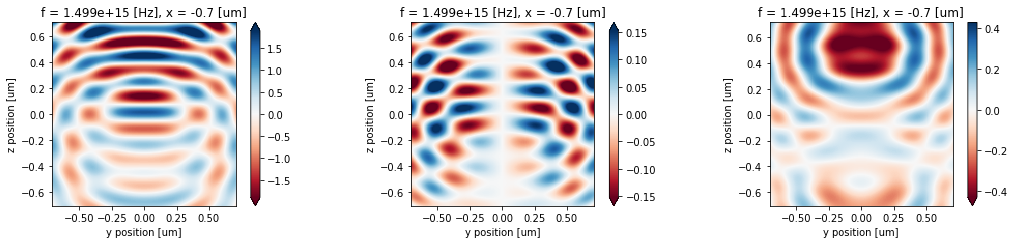

<Figure size 1080x252 with 6 Axes>

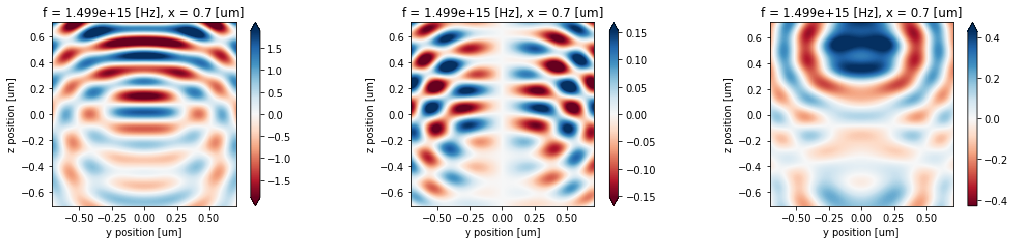

<Figure size 1080x252 with 6 Axes>

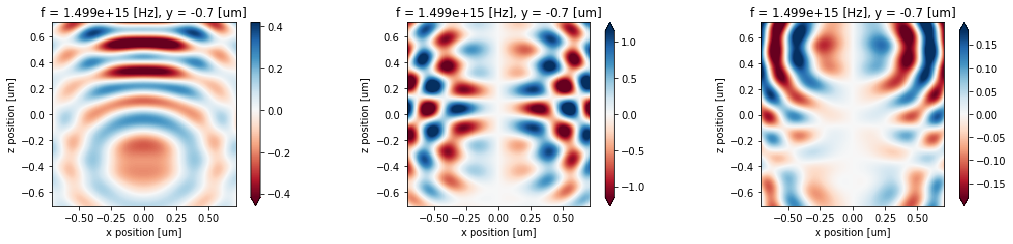

<Figure size 1080x252 with 6 Axes>

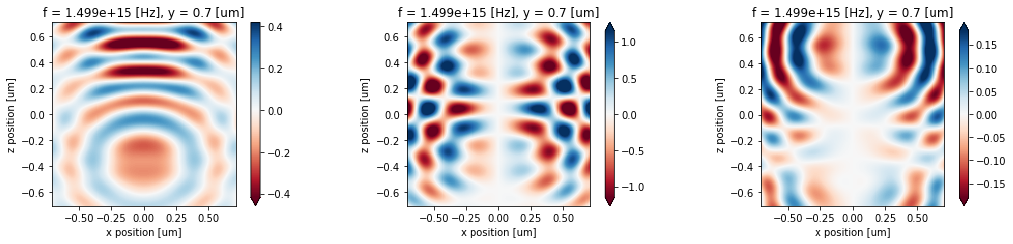

<Figure size 1080x252 with 6 Axes>

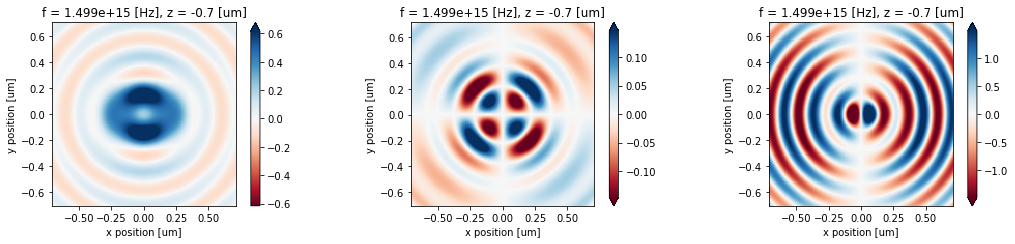

<Figure size 1080x252 with 6 Axes>

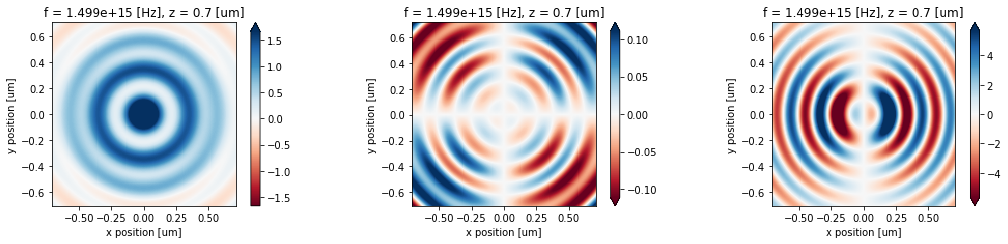

In [275]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ex', x=monitors[0].center[0], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ey', x=monitors[0].center[0], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ez', x=monitors[0].center[0], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ex', x=monitors[1].center[0], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ey', x=monitors[1].center[0], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ez', x=monitors[1].center[0], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ex', y=monitors[2].center[1], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ey', y=monitors[2].center[1], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ez', y=monitors[2].center[1], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ex', y=monitors[3].center[1], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ey', y=monitors[3].center[1], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ez', y=monitors[3].center[1], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ex', z=monitors[4].center[2], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ey', z=monitors[4].center[2], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ez', z=monitors[4].center[2], val='real', freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 3.5))

sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ex', z=monitors[5].center[2], val='real', freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ey', z=monitors[5].center[2], val='real', freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ez', z=monitors[5].center[2], val='real', freq=f0, ax=ax3)

plt.show()

In [279]:
n2fmons = copy.deepcopy(monitors)
#del n2fmons[0:3]
n2f = Near2Far(sim_data, mons=n2fmons, frequency=f0, pts_per_wavelength=5)
n2f.spacetime_sign = -1

# projection distance
far_distance = 100 * wavelength

num_theta = 300
num_phi = 2
thetas = np.linspace(0, np.pi, num_theta)
phis = np.linspace(0, np.pi/2, num_phi)

# initialize the far field values
RCS = np.zeros((num_theta, num_phi), dtype=float)
E = np.zeros((3, num_theta, num_phi), dtype=complex)

from rich.progress import track

# loop through points in the output plane
for i in track(np.arange(len(thetas)), description='Performing far-field transformation...'):

    theta = thetas[i]
    for j in np.arange(len(phis)):
        phi = phis[j]

        # compute and store the outputs from projection function at the focal plane
        _RCS = n2f.radar_cross_section(far_distance, theta, phi)
        RCS[i, j] = np.squeeze(_RCS)

        _E, _H = n2f.fields_spherical(far_distance, theta, phi)
        E[:, i, j] = np.squeeze(_E)
        
        #print(RCS[i, j], E[i, j])



Output()

/home/shashwat/flexcompute/venvs/tidy3d/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/shashwat/flexcompute/venvs/tidy3d/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_21688/1090782509.py:9: RuntimeWarning: invalid value encountered in true_divide
  val = val / np.max(np.abs(val))
/tmp/ipykernel_21688/1090782509.py:9: RuntimeWarning: invalid value encountered in true_divide
  val = val / np.max(np.abs(val))


<Figure size 540x360 with 1 Axes>

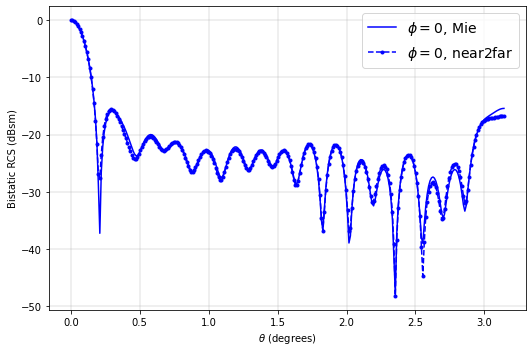

<Figure size 540x360 with 1 Axes>

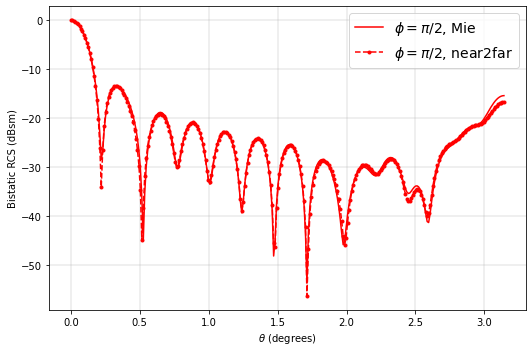

<Figure size 540x360 with 1 Axes>

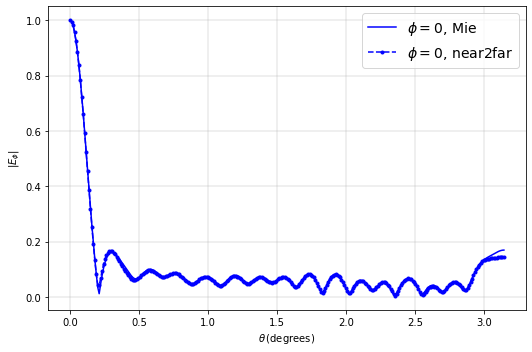

<Figure size 540x360 with 1 Axes>

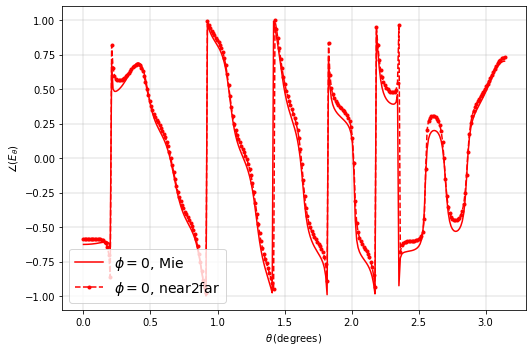

<Figure size 540x360 with 1 Axes>

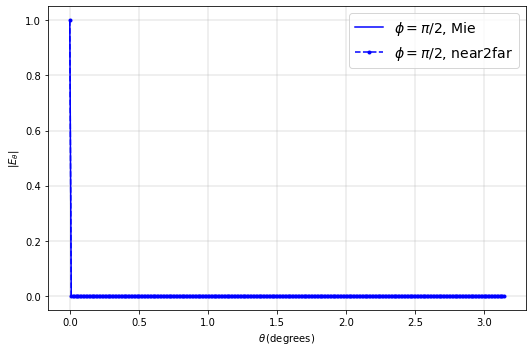

<Figure size 540x360 with 1 Axes>

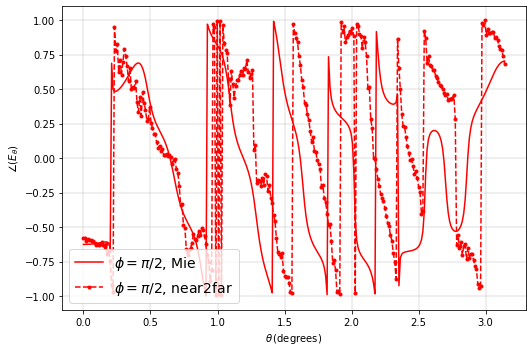

<Figure size 540x360 with 1 Axes>

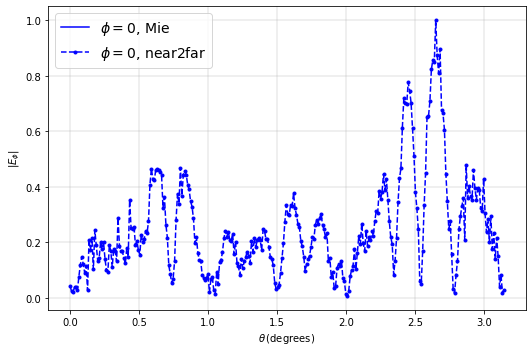

<Figure size 540x360 with 1 Axes>

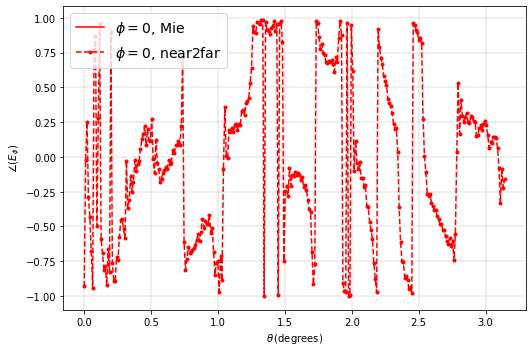

<Figure size 540x360 with 1 Axes>

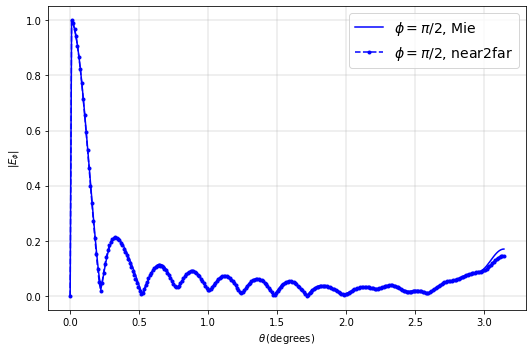

<Figure size 540x360 with 1 Axes>

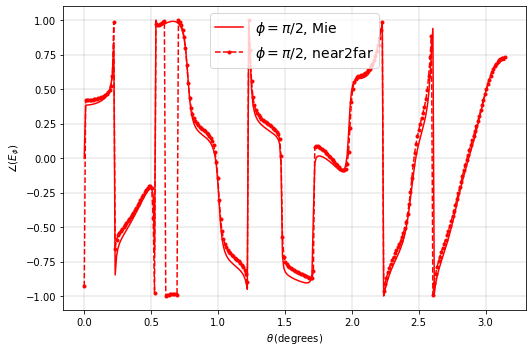

In [280]:
def scale_fn(val):
    val = val / np.max(np.abs(val))
    return 10.0*np.log10(val)

def plot_fn(val):
    return np.abs(val)

def plot_fn2(val):
    val = val / np.max(np.abs(val))
    return val

fileid = '0p2lamb_epsr4'


# ====== RCS ======

RCS_phi0 = scale_fn(np.squeeze(RCS[:,0]))
RCS_phi90 = scale_fn(np.squeeze(RCS[:,1]))

mie_filename_phi0 = "./data/mie_bRCS_phi0_" + fileid + ".txt"
mie_filename_phi90 = "./data/mie_bRCS_phi90_" + fileid + ".txt"

mie_data_phi0 = np.loadtxt(mie_filename_phi0, delimiter='\t', skiprows=2)
mie_theta_phi0 = np.squeeze(mie_data_phi0[:,[0]])
mie_phi0 = scale_fn(np.squeeze(mie_data_phi0[:,[1]]))

mie_data_phi90 = np.loadtxt(mie_filename_phi90, delimiter='\t', skiprows=2)
mie_theta_phi90 = np.squeeze(mie_data_phi90[:,[0]])
mie_phi90 = scale_fn(np.squeeze(mie_data_phi90[:,[1]]))

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_theta_phi0, mie_phi0, '-b', label="$\\phi = 0$, Mie")
ax.plot(thetas, RCS_phi0, '.--b', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta$ (degrees)",
       ylabel = "Bistatic RCS (dBsm)",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_theta_phi90, mie_phi90, '-r', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, RCS_phi90, '.--r', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta$ (degrees)",
       ylabel = "Bistatic RCS (dBsm)",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()


# ====== E ======

Eth_phi0 = ((np.squeeze(E[1,:,0])))
Eth_phi90 = ((np.squeeze(E[1,:,1])))

Eph_phi0 = ((np.squeeze(E[2,:,0])))
Eph_phi90 = ((np.squeeze(E[2,:,1])))

mie_E_filename_phi0 = "./data/mie_E_phi0_" + fileid + ".txt"
mie_E_filename_phi90 = "./data/mie_E_phi90_" + fileid + ".txt"

mie_E_data_phi0 = np.loadtxt(mie_E_filename_phi0, delimiter=' ', skiprows=2)
mie_E_theta_phi0 = np.squeeze(mie_E_data_phi0[:,[0]])
mie_Eth_phi0 = (np.squeeze(mie_E_data_phi0[:,[3]] + 1j*mie_E_data_phi0[:,[4]]))
mie_Eph_phi0 = (np.squeeze(mie_E_data_phi0[:,[5]] + 1j*mie_E_data_phi0[:,[6]]))

mie_E_data_phi90 = np.loadtxt(mie_E_filename_phi90, delimiter=' ', skiprows=2)
mie_E_theta_phi90 = np.squeeze(mie_E_data_phi90[:,[0]])
mie_Eth_phi90 = (np.squeeze(mie_E_data_phi90[:,[3]] + 1j*mie_E_data_phi90[:,[4]]))
mie_Eph_phi90 = (np.squeeze(mie_E_data_phi90[:,[5]] + 1j*mie_E_data_phi90[:,[6]]))

# ------ E_theta, phi = 0 ------

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi0, plot_fn2(np.abs(mie_Eth_phi0)), '-b', label="$\\phi = 0$, Mie")
ax.plot(thetas, plot_fn2(np.abs(Eth_phi0)), '--.b', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$|E_\\phi|$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi0, plot_fn2(np.angle(mie_Eth_phi0)), '-r', label="$\\phi = 0$, Mie")
ax.plot(thetas, plot_fn2(np.angle(Eth_phi0)), '--.r', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$\\angle(E_\\theta)$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

# ------ E_theta, phi = 90 ------

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi90, plot_fn2(np.abs(mie_Eth_phi90)), '-b', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, plot_fn2(np.abs(Eth_phi90)), '--.b', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$|E_\\theta|$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi90, plot_fn2(np.angle(mie_Eth_phi90)), '-r', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, plot_fn2(np.angle(Eth_phi90)), '--.r', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$\\angle(E_\\theta)$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

# ------ E_phi, phi = 0 ------

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi0, plot_fn2(np.abs(mie_Eph_phi0)), '-b', label="$\\phi = 0$, Mie")
ax.plot(thetas, plot_fn2(np.abs(Eph_phi0)), '--.b', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$|E_\\phi|$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi0, plot_fn2(np.angle(mie_Eph_phi0)), '-r', label="$\\phi = 0$, Mie")
ax.plot(thetas, plot_fn2(np.angle(Eph_phi0)), '--.r', label="$\\phi = 0$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$\\angle(E_\\phi)$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

# ------ E_phi, phi = 90 ------

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi90, plot_fn2(np.abs(mie_Eph_phi90)), '-b', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, plot_fn2(np.abs(Eph_phi90)), '--.b', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$|E_\\phi|$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7.5, 5))

ax.plot(mie_E_theta_phi90, plot_fn2(np.angle(mie_Eph_phi90)), '-r', label="$\\phi = \\pi/2$, Mie")
ax.plot(thetas, plot_fn2(np.angle(Eph_phi90)), '--.r', label="$\\phi = \\pi/2$, near2far")
ax.set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$\\angle(E_\\phi)$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
plt.legend(loc='best', prop={'size': 14})
plt.tight_layout()

plt.show()